<a href="https://colab.research.google.com/github/rishibarad/jupyter_notebooks/blob/master/Basic%20Image%20Processing%20in%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discussion 2: Basic Image Processing in Python 

The goal of this notebook is to introduce you to some basic image processing in python. This notebook will use the Python Image Library, NumPy and Matlab Plotting Library. 

In [0]:
# We first import NumPy, PIL, and Matplotlib
import numpy as np
from PIL import Image 
%matplotlib inline 
import matplotlib.pyplot as plt

For this tutorial, we will use an image of a cat as our primary subject. You can replace the following lines with your favorite image. 

We first download the image and read it in using PIL's Image class

In [0]:
# Download an image; you can use the exclamation mark to run terminal commands. 
!wget https://upload.wikimedia.org/wikipedia/commons/b/b6/Felis_catus-cat_on_snow.jpg
cat = Image.open('Felis_catus-cat_on_snow.jpg')

--2020-01-27 16:12:00--  https://upload.wikimedia.org/wikipedia/commons/b/b6/Felis_catus-cat_on_snow.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2125399 (2.0M) [image/jpeg]
Saving to: ‘Felis_catus-cat_on_snow.jpg’

Felis_catus-cat_on_ 100%[===================>]   2.03M  4.08MB/s    in 0.5s    

2020-01-27 16:12:00 (4.08 MB/s) - ‘Felis_catus-cat_on_snow.jpg’ saved [2125399/2125399]



Let's verify that we got the right image by using Matplotlib

Object type:  <class 'PIL.JpegImagePlugin.JpegImageFile'>


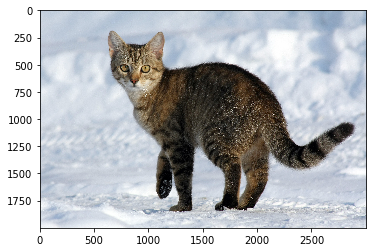

In [0]:
print("Object type: ", type(cat))
plt.imshow(cat)

Now, we can convert the image into a numpy array for easier handling.

In [0]:
cat = np.array(cat)
print("Size of array: ", cat.shape)

Size of array:  (2000, 3000, 3)


We would like to only see the face of the image. Through inspecting the grid, we find that the face corresponds to rows 150-750 and columns 600-1300. We can index that directly

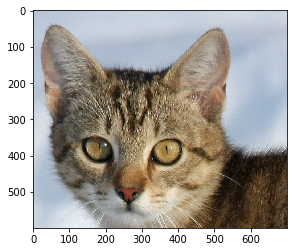

In [0]:
cat_face = cat[150:750, 600:1300, :]
plt.imshow(cat_face)

How can we plot the separate color components? We can simply index the different channels of the image, and plot each channel as a grey-scale image. 

We can use subplot to plot all the figures in the same image. 

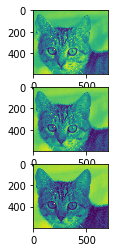

In [0]:
face_r = cat_face[:, :, 0]
face_g = cat_face[:, :, 1]
face_b = cat_face[:, :, 2]

plt.subplot(3,1,1) 
plt.imshow(face_r)
plt.subplot(3,1,2) 
plt.imshow(face_g)
plt.subplot(3,1,3) 
plt.imshow(face_b)

Why do they all look green? It turns out that matplotlib has a default colormap that looks green-ish. 
We can specify the color map using the cmap parameter.

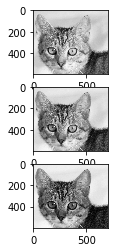

In [0]:
plt.subplot(3,1,1) 
plt.imshow(face_r, cmap='Greys_r')
plt.subplot(3,1,2) 
plt.imshow(face_g, cmap='Greys_r')
plt.subplot(3,1,3) 
plt.imshow(face_b, cmap='Greys_r')

They all look similar, are those the different color channels? 
Let's check this with a Rubik's cube. 

--2020-01-27 16:12:23--  https://live.staticflickr.com/3340/3249196137_0bc543d5e0.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 13.224.9.167, 2600:9000:2164:3a00:0:5a51:64c9:c681, 2600:9000:2164:d600:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|13.224.9.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘3249196137_0bc543d5e0.jpg’

3249196137_0bc543d5     [ <=>                ]  25.32K  --.-KB/s    in 0.002s  

2020-01-27 16:12:24 (16.0 MB/s) - ‘3249196137_0bc543d5e0.jpg’ saved [25924]



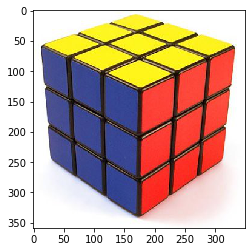

In [0]:
!wget https://live.staticflickr.com/3340/3249196137_0bc543d5e0.jpg
rubik = Image.open('3249196137_0bc543d5e0.jpg')
rubik = np.array(rubik)

plt.imshow(rubik)

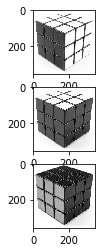

In [0]:
rubik_r = rubik[:, :, 0]
rubik_g = rubik[:, :, 1]
rubik_b = rubik[:, :, 2]

plt.subplot(3,1,1) 
plt.imshow(rubik_r, cmap='Greys_r')
plt.subplot(3,1,2) 
plt.imshow(rubik_g, cmap='Greys_r')
plt.subplot(3,1,3) 
plt.imshow(rubik_b, cmap='Greys_r')

## What else would you like to see? 

We can use colorbar to display the scale that is used to show the color intensities for single channel images (eg. greyscale) 

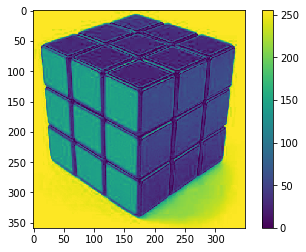

In [0]:
plt.imshow(rubik_b)
plt.colorbar()

Defining helper functions can be very useful especially when you will use the same functionality multiple times. Below is a function that dispays the image with a color bar. 

In [0]:
def show_img(img):
  plt.imshow(img)
  plt.colorbar()

Q: How can we isolate the blue pixels.

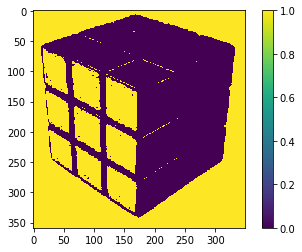

In [0]:
# First attempt: all pixels with a high blue intensity
# Problem: white pixels also have a high blue component. 
blue_pix = (rubik_b > 130).astype(np.float)
show_img(blue_pix)

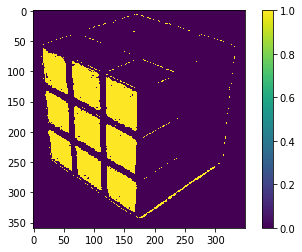

In [0]:
# Second attempt: filter based on a range of blue pixels
# Works alright, but makes assumptions about the range of values blue can take
blue_min = (rubik_b > 130)
blue_max = (rubik_b < 170)
blue_range = (blue_min & blue_max).astype(np.float)
show_img(blue_range)


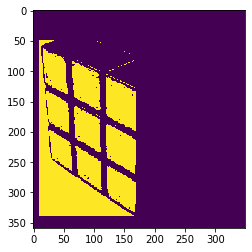

In [0]:
# Third attempt: filter based on location
# Problem: includes white pixels within location range
loc_filter = np.zeros_like(blue_min)
loc_filter[50:340, 10:170] = 1.

loc_filter = loc_filter * blue_min.astype(np.float)
plt.imshow(loc_filter)

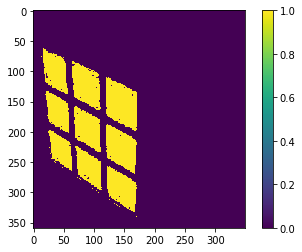

In [0]:
# Fourth attempt: filter based on high red value, but low green and red values. 
# Works pretty well. 
no_RG = (rubik_g > 130) | (rubik_r > 130)

blue_filt = blue_min & (1 - no_RG.astype(np.float)).astype(bool)
show_img(blue_filt.astype(np.float))